In [137]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import lightgbm as lgbm


%matplotlib inline

In [138]:
#pip install lightgbm

In [139]:
PATH = 'D:/GitHub/Study/MADE_2022_1_Bin_Classification/MADE_2022_1_Bin_Classification/data/'

In [140]:
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')
sam_sub = pd.read_csv(PATH + 'sample_submission.csv')

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6963 non-null   float64
 1   1       6963 non-null   float64
 2   2       6963 non-null   float64
 3   3       6963 non-null   float64
 4   4       6963 non-null   float64
 5   5       6963 non-null   float64
 6   6       6963 non-null   float64
 7   7       6963 non-null   float64
 8   8       6963 non-null   float64
 9   9       6963 non-null   float64
 10  10      6963 non-null   float64
 11  11      6963 non-null   float64
 12  12      6963 non-null   float64
 13  13      6963 non-null   float64
 14  14      6963 non-null   float64
 15  15      6963 non-null   float64
 16  16      6963 non-null   float64
 17  17      6963 non-null   float64
 18  18      6963 non-null   float64
 19  19      6963 non-null   float64
 20  20      6963 non-null   float64
 21  21      6963 non-null   float64
 22  

In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3920 non-null   float64
 1   1       3920 non-null   float64
 2   2       3920 non-null   float64
 3   3       3920 non-null   float64
 4   4       3920 non-null   float64
 5   5       3920 non-null   float64
 6   6       3920 non-null   float64
 7   7       3920 non-null   float64
 8   8       3920 non-null   float64
 9   9       3920 non-null   float64
 10  10      3920 non-null   float64
 11  11      3920 non-null   float64
 12  12      3920 non-null   float64
 13  13      3920 non-null   float64
 14  14      3920 non-null   float64
 15  15      3920 non-null   float64
 16  16      3920 non-null   float64
 17  17      3920 non-null   float64
 18  18      3920 non-null   float64
 19  19      3920 non-null   float64
 20  20      3920 non-null   float64
 21  21      3920 non-null   float64
 22  

In [143]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
train['sample'] = 1 # помечаем где у нас трейн
test['sample'] = 0 # помечаем где у нас тест

df = test.append(train, sort=False).reset_index(drop=True) # объединяем

C:\Users\Rusla\AppData\Local\Temp\ipykernel_14964\1945411949.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = test.append(train, sort=False).reset_index(drop=True) # объединяем


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10883 non-null  float64
 1   1       10883 non-null  float64
 2   2       10883 non-null  float64
 3   3       10883 non-null  float64
 4   4       10883 non-null  float64
 5   5       10883 non-null  float64
 6   6       10883 non-null  float64
 7   7       10883 non-null  float64
 8   8       10883 non-null  float64
 9   9       10883 non-null  float64
 10  10      10883 non-null  float64
 11  11      10883 non-null  float64
 12  12      10883 non-null  float64
 13  13      10883 non-null  float64
 14  14      10883 non-null  float64
 15  15      10883 non-null  float64
 16  16      10883 non-null  float64
 17  17      10883 non-null  float64
 18  18      10883 non-null  float64
 19  19      10883 non-null  float64
 20  20      10883 non-null  float64
 21  21      10883 non-null  float64
 22

In [145]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,sample,target
6792,0.770678,-7.566431,-3.935781,0.731505,-3.850789,2.251262,4.806844,-3.220037,-0.086375,1.184434,...,2.499544,-0.946052,2.659622,0.366868,-0.006586,-3.502635,-10.096837,4.891255,1,1.0


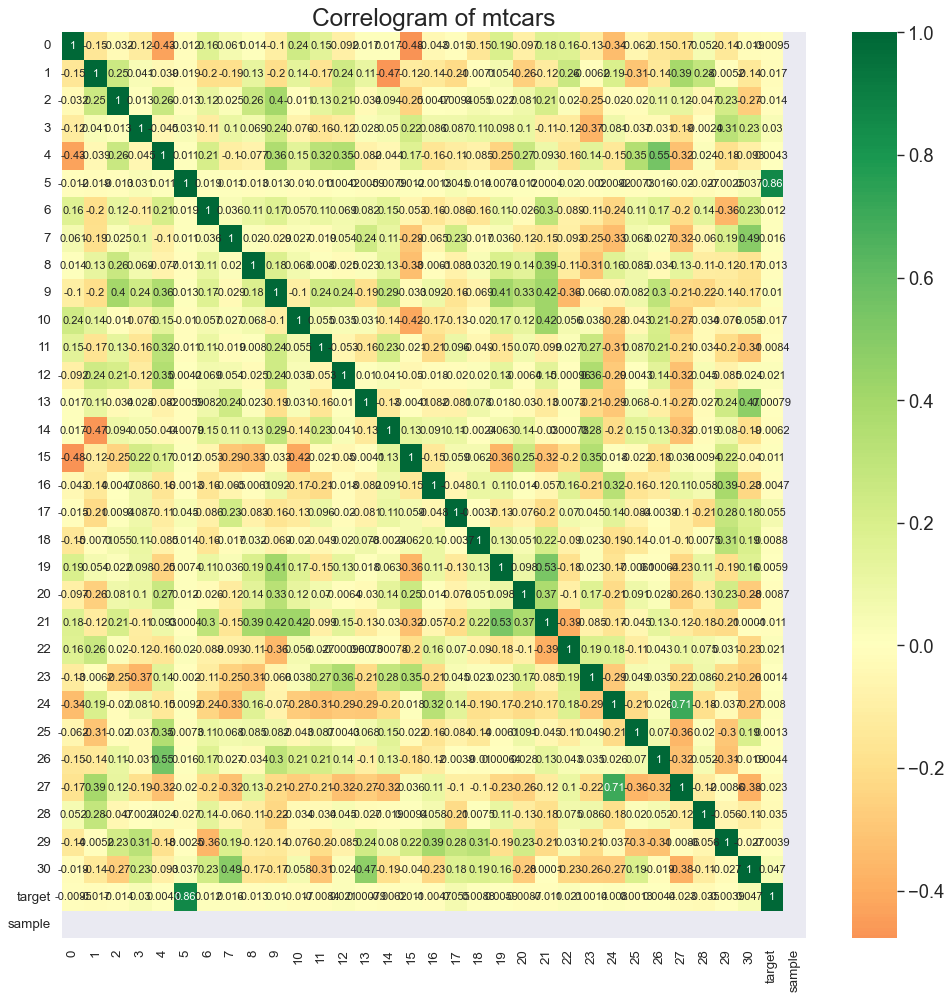

In [146]:
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

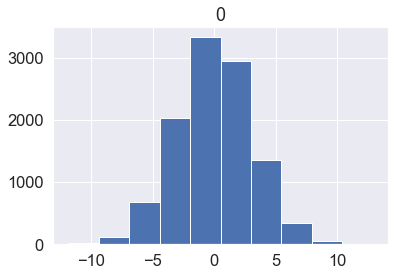

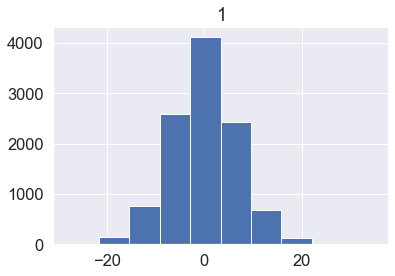

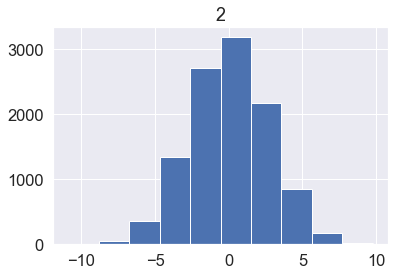

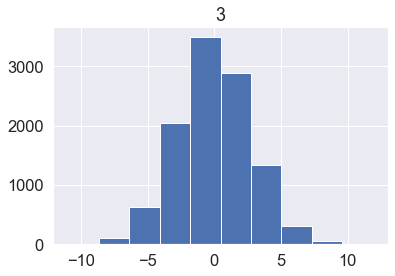

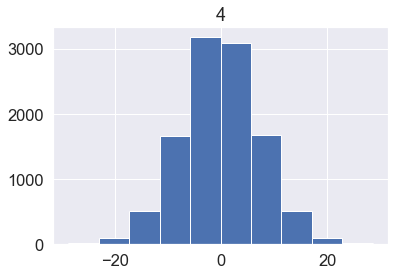

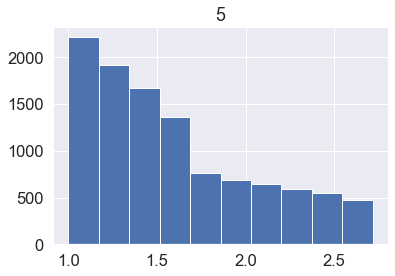

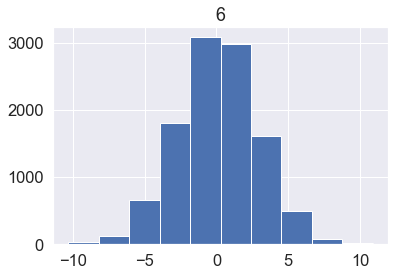

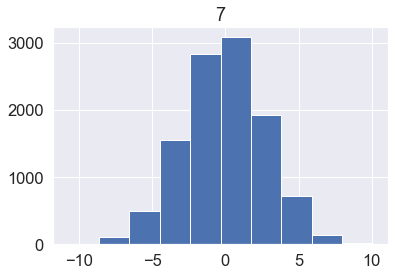

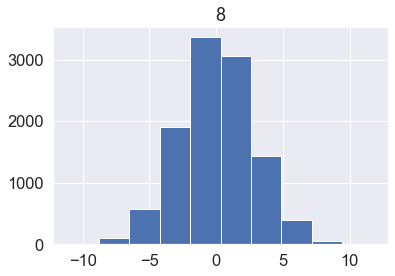

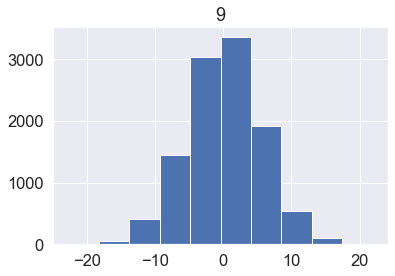

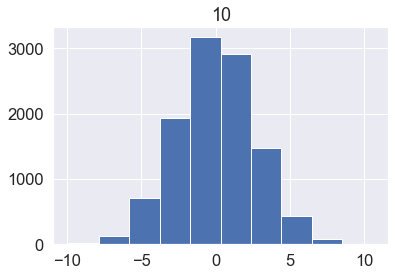

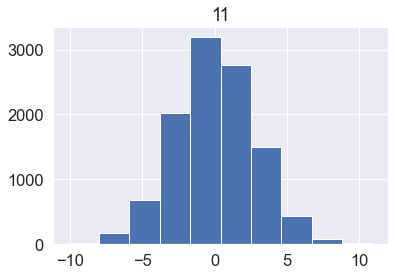

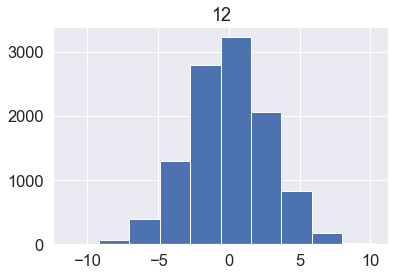

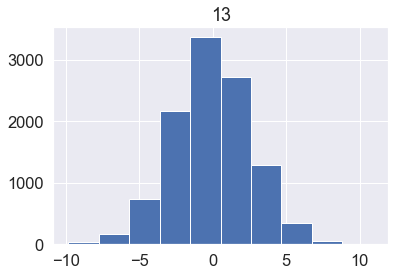

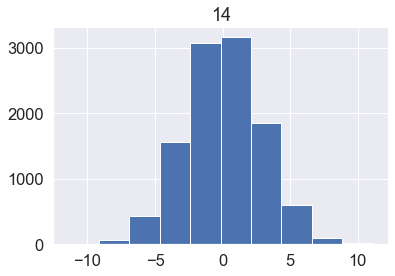

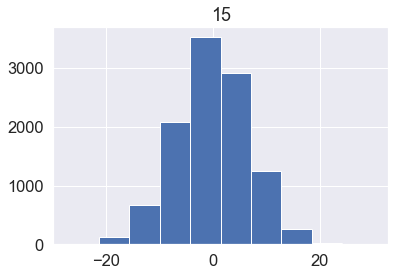

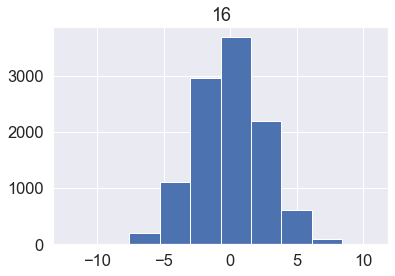

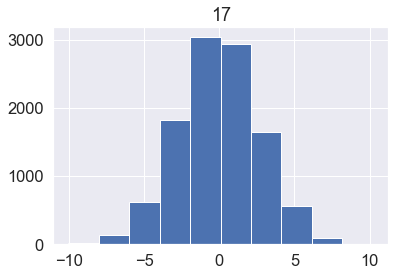

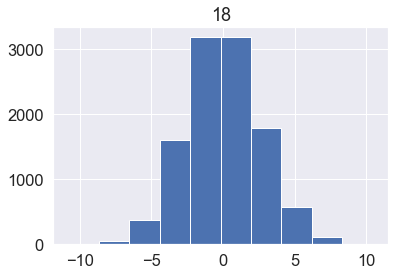

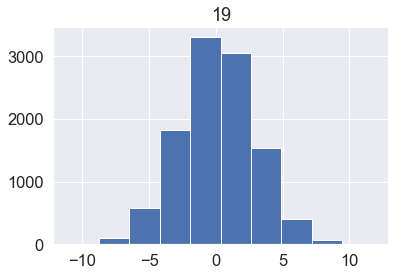

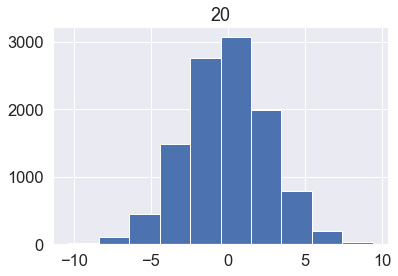

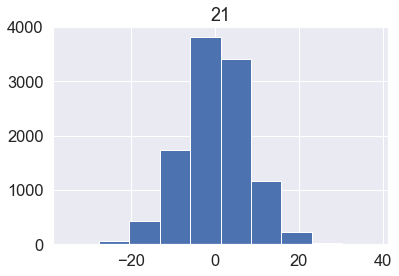

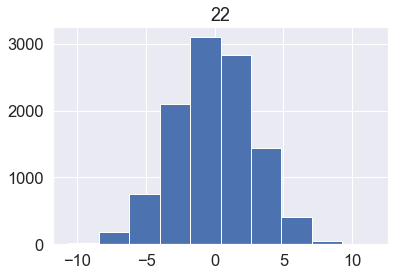

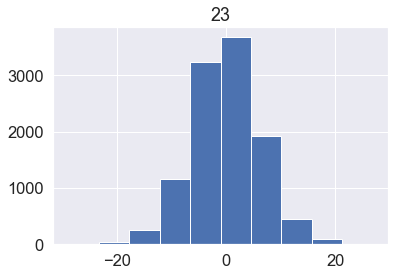

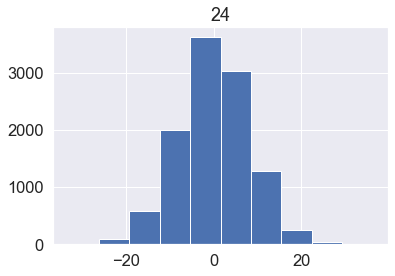

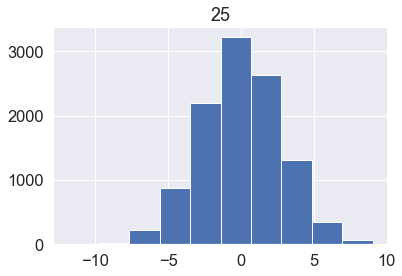

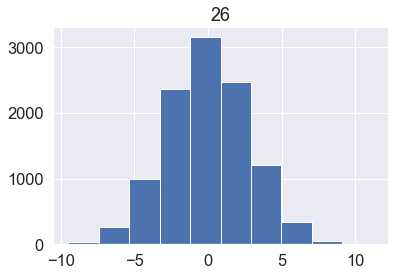

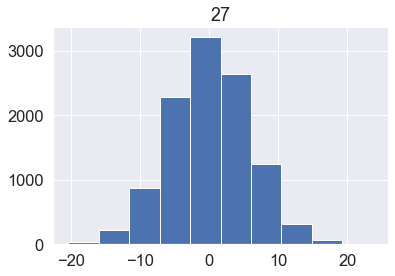

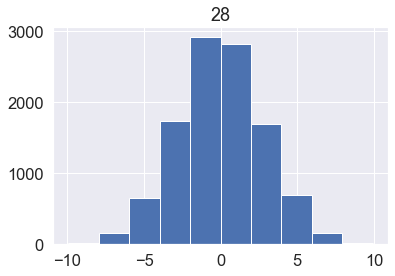

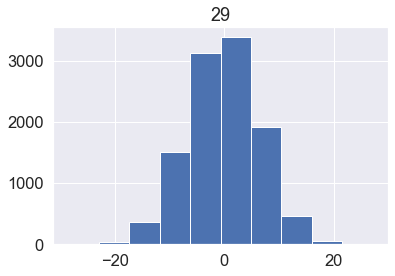

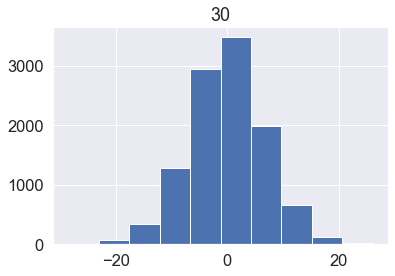

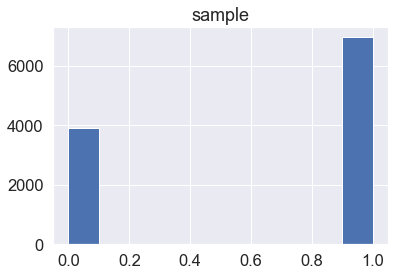

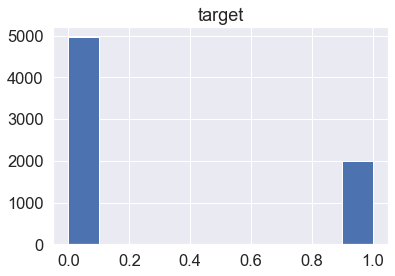

In [147]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [148]:
train = df[df['sample'] == 1].copy()
train.drop(['sample', '5'], axis = 1, inplace = True)

In [189]:
test = df[df['sample'] == 0].copy()
test.drop(['sample','target', '5'], axis = 1, inplace = True)

In [150]:
X = train.drop(['target'], axis = 1).copy()
Y = train['target']

In [151]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.4)

In [152]:
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val,
                                                    stratify=y_test_val, 
                                                    test_size=0.5)

In [153]:
model = lgbm.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.7837445573294631

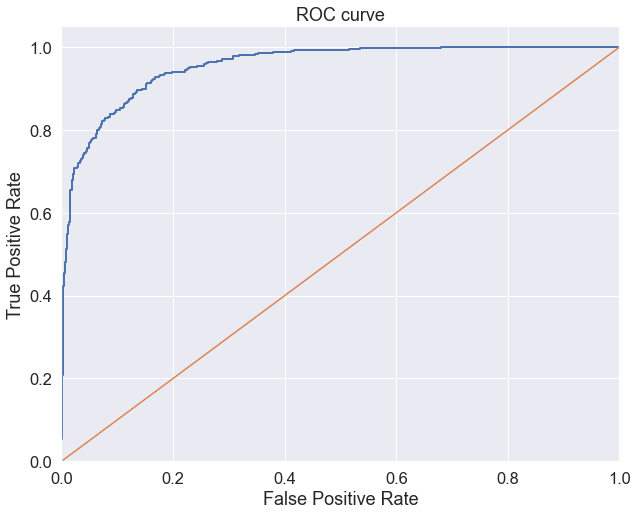

In [154]:
from sklearn import metrics

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [155]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [156]:
proc_name = (StandardScaler(), Normalizer(), MinMaxScaler())

In [157]:
for i in proc_name:
    model_2 = make_pipeline(i,lgbm.LGBMClassifier())
    model_2.fit(X_val, y_val)
    y_pred = model_2.predict(X_test)
    print(i, '= ', f1_score(y_test, y_pred))

StandardScaler() =  0.6819571865443426
Normalizer() =  0.6879756468797564
MinMaxScaler() =  0.6749611197511665


In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [159]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_val_score(model, X_val, y_val, scoring='f1', cv=cv, n_jobs=-1)

array([0.71428571, 0.66666667, 0.53333333, 0.56666667, 0.65625   ,
       0.6984127 , 0.77142857, 0.73239437, 0.74626866, 0.65625   ,
       0.75757576, 0.59016393, 0.50847458, 0.70967742, 0.73529412,
       0.74626866, 0.75362319, 0.64705882, 0.6557377 , 0.65625   ,
       0.71428571, 0.68656716, 0.61016949, 0.69565217, 0.70769231,
       0.70769231, 0.61538462, 0.70588235, 0.68656716, 0.73846154])

In [160]:
model.fit(X_train, y_train)

LGBMClassifier()

In [161]:
y_pred_val = model.predict(X_val)
f1_score(y_val, y_pred_val)

0.7701149425287356

In [162]:
model_2 = make_pipeline(Normalizer(),model)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
f1_score(y_test, y_pred_2)

0.7912087912087912

In [169]:
def get_models():
    models = dict()
    trees = [10, 50, 100, 500]
    for n in trees:
        models[str(n)] = lgbm.LGBMClassifier(n_estimators=n)
    return models

In [170]:
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_val, y_val, scoring='f1', cv=cv, n_jobs=-1)
    return scores

>10 0.325 (0.074)
>50 0.636 (0.077)
>100 0.679 (0.065)
>500 0.734 (0.062)


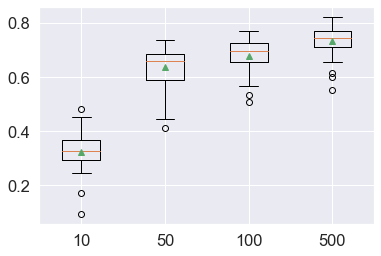

In [172]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [173]:
def get_models():
    models = dict()
    trees = [100, 200, 300, 400, 500, 600]
    for n in trees:
        models[str(n)] = lgbm.LGBMClassifier(n_estimators=n)
    return models

>100 0.679 (0.065)
>200 0.709 (0.064)
>300 0.721 (0.060)
>400 0.729 (0.059)
>500 0.734 (0.062)
>600 0.737 (0.061)


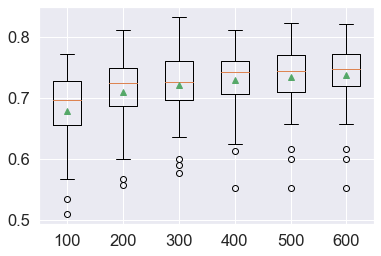

In [174]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [175]:
def get_models():
    models = dict()
    trees = [500, 600, 700, 800, 900, 1000]
    for n in trees:
        models[str(n)] = lgbm.LGBMClassifier(n_estimators=n)
    return models

>500 0.734 (0.062)
>600 0.737 (0.061)
>700 0.740 (0.060)
>800 0.740 (0.062)
>900 0.741 (0.061)
>1000 0.741 (0.061)


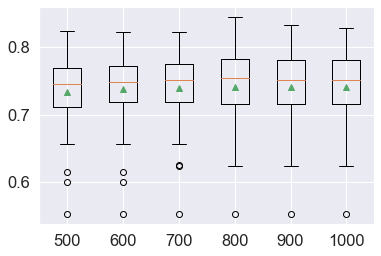

In [176]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [177]:
def get_models_2():
    models = dict()
    for i in range(5,12):
        models[str(i)] = lgbm.LGBMClassifier(n_estimators = 700, max_depth=i, num_leaves=2**i)
    return models

>5 0.706 (0.061)
>6 0.725 (0.061)
>7 0.719 (0.069)
>8 0.737 (0.069)
>9 0.735 (0.050)
>10 0.732 (0.060)
>11 0.725 (0.062)


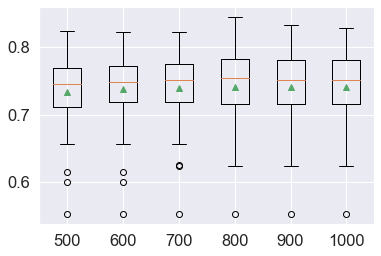

In [179]:
# get the models to evaluate
models_2 = get_models_2()
# evaluate the models and store results
results_2, names_2 = list(), list()
for name, model in models_2.items():
    scores = evaluate_model(model)
    results_2.append(scores)
    names_2.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results_2, labels=names_2, showmeans=True)
plt.show()

In [180]:
def get_models_3():
    models = dict()
    rates = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12]
    for r in rates:
        key = '%.4f' % r
        models[key] = lgbm.LGBMClassifier(n_estimators = 700, 
                                          max_depth=8, num_leaves=2**8, learning_rate=r)
    return models

>0.0500 0.716 (0.062)
>0.0600 0.716 (0.062)
>0.0700 0.717 (0.055)
>0.0800 0.726 (0.053)
>0.0900 0.728 (0.071)
>0.1000 0.737 (0.069)
>0.1100 0.731 (0.063)
>0.1200 0.730 (0.067)


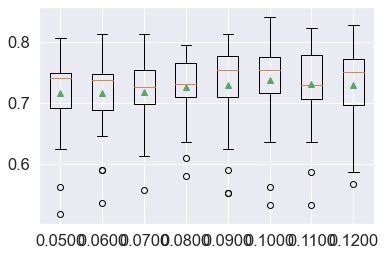

In [181]:
# get the models to evaluate
models = get_models_3()
# evaluate the models and store results
results_3, names_3 = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results_3.append(scores)
    names_3.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results_3, labels=names_3, showmeans=True)
plt.show()

In [183]:
def get_models_4():
    models = dict()
    types = ['gbdt', 'dart', 'goss']
    for t in types:
        models[t] = lgbm.LGBMClassifier(n_estimators = 700, max_depth=8, 
                                        num_leaves=2**8, learning_rate=0.1, boosting_type=t)
    return models

>gbdt 0.737 (0.069)
>dart 0.695 (0.062)
>goss 0.752 (0.045)


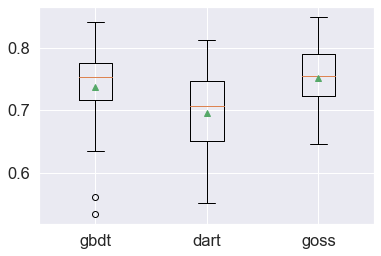

In [185]:
# get the models to evaluate
models = get_models_4()
# evaluate the models and store results
results_4, names_4 = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results_4.append(scores)
    names_4.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison

plt.boxplot(results_4, labels=names_4, showmeans=True)
plt.show()

In [186]:
model_2 = lgbm.LGBMClassifier(n_estimators = 700, max_depth=8, 
                            num_leaves=2**8, learning_rate=0.1,
                             boosting_type='goss')
evaluate_model(model_2)
model_2.fit(X_train, y_train)

LGBMClassifier(boosting_type='goss', max_depth=8, n_estimators=700,
               num_leaves=256)

In [187]:
model_3 = make_pipeline(Normalizer(),model_2)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)
f1_score(y_test, y_pred_3)

0.8506666666666667

In [ ]:
test = df[df['sample'] == 0].copy()
test.drop(['sample','target', '5'], axis = 1, inplace = True)

In [190]:
tar = model_3.predict(test)

In [191]:
test['target'] = tar

In [192]:
test.sample()

,0,1,2,3,4,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,target
2752,5.170075,-7.383243,-2.212796,-0.96608,-3.043335,2.027091,-6.123641,2.999756,5.814357,-2.846255,...,1.290539,1.615212,5.725185,0.620203,-2.045514,0.597857,-6.360793,-9.667802,-7.157957,1.0


In [193]:
submission = test[['target']]

In [194]:
display(submission.sample(10))
display(submission.shape)

,target
2770,0.0
472,0.0
2726,0.0
2314,1.0
3305,1.0
1704,1.0
2377,0.0
2201,1.0
2813,1.0
3177,0.0


(3920, 1)

In [195]:
submission.to_csv('submission.csv', index=False)